Generates data used in the am_summary display notebook.

In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
file1 = "data/histogram-4.pkl"
hmdrs = [20, 30]
right_ratios = [0.5, 0.95, 1.05, 1.3]
shielding_values = [-5, 5, 10, 15]

rho, big_nmk, nmk_max = 1023, 200, 150

def variable_values(cf):
  return {"(h-d0)/radwidth0" : (cf["h"]-cf["d"][0])/(cf["a"][0]),
          "(h-d1)/(h-d0)" : (cf["h"]-cf["d"][1])/(cf["h"]-cf["d"][0]),
          "max((di-d0)/(a(i-1)-a0))" : max([(cf["d"][i] - cf["d"][0])/(cf["a"][i-1] - cf["a"][0]) for i in range(2, len(cf["d"]))])}

def generate_h_d_a_m0_3_region(hmdr, right_ratio, shielding_value):
  hmd0 = random.uniform(low = 0, high = 10)
  hmd1 = right_ratio * hmd0
  radwidth0 = hmd0/hmdr

  if shielding_value > 0:
    rad_max = hmd0/shielding_value
    radwidth1 = hmd1/random.uniform(low = max(1,hmd1 * 1.1/rad_max), high = 20)
  else:
    radwidth1 = hmd1/random.uniform(low = 1, high = 10)

  d_diff_max = shielding_value * radwidth1
  hmd2 = hmd0 - d_diff_max
  radwidth2 = hmd2/random.uniform(low = 1, high = 10)

  a = [radwidth0, radwidth0 + radwidth1, radwidth0 + radwidth1 + radwidth2]
  hmds = [hmd0, hmd1, hmd2]

  h_min = max(hmds)
  h = random.uniform(low = 1.1 * h_min, high = 3 * h_min)
  m0 = random.uniform(low = 1/h, high = 80/h)
  d = [h-hmd for hmd in hmds]
  for i in range(len(d)):
    assert d[i] > 0
    inner = 0 if i == 0 else a[i-1]
    assert a[i] > inner
  return h, d, a, m0

def solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 0):
  prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
  mk = prob.m_k
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : [m0]}
  print(info)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))

# all_prob_sets = []
# region_count, heaving, NMK = 3, [1, 0, 0], [big_nmk] * 4
# for hmdr in hmdrs:
#   for right_ratio in right_ratios:
#     for shielding_value in shielding_values:
#       prob_set = []
#       for i in range(50):
#         h, d, a, m0 = generate_h_d_a_m0_3_region(hmdr, right_ratio, shielding_value)
#         prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
#       all_prob_sets.append(prob_set)
#       update_data_file(all_prob_sets, file1)
#       print("Finished a set.", region_count, hmdr, right_ratio, shielding_value)

# region_count, heaving, NMK = 6, [1, 0, 0, 0, 0, 0], [big_nmk] * 7
# for hmdr in [hmdrs[1]]:
#   for right_ratio in [right_ratios[0], right_ratios[2]]:
#     for shielding_value in shielding_values[0:2]:
#       prob_set = []
#       for i in range(50):
#         h, d, a, m0 = generate_h_d_a_m0(hmdr, right_ratio, shielding_value, region_count)
#         # prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
#       # all_prob_sets.append(prob_set)
#       # update_data_file(all_prob_sets, file1)
#       print("Finished a set.", region_count, hmdr, right_ratio, shielding_value)

In [3]:
hist_prob_sets = open_pkl_file(file1)
for subset in hist_prob_sets:
  generate_convergence_data(subset, [0.01, 0.005])
  generate_log_data(subset)

In [ ]:
file2 = "data/histogram-5.pkl"
# Repeated runs for right ratio > 1, now with fixed r0/r1.

hmdrs = [20, 30]
right_ratios = [1.05, 1.3]
shielding_values = [-5, 5, 10, 15]
rho, big_nmk, nmk_max = 1023, 200, 150

def generate_h_d_a_m0_3_region_v2(hmdr, right_ratio, shielding_value):
  hmd0 = random.uniform(low = 0, high = 10)
  hmd1 = right_ratio * hmd0
  radwidth0 = hmd0/hmdr
  rad_min = radwidth0 * right_ratio * hmdr / 20

  if shielding_value > 0:
    rad_max = hmd0/shielding_value
  else:
    rad_max = radwidth0 * right_ratio * hmdr
  radwidth1 = (rad_max + rad_min)/2

  d_diff_max = shielding_value * radwidth1
  hmd2 = hmd0 - d_diff_max
  radwidth2 = hmd2/random.uniform(low = 1, high = 10)

  a = [radwidth0, radwidth0 + radwidth1, radwidth0 + radwidth1 + radwidth2]
  hmds = [hmd0, hmd1, hmd2]

  h_min = max(hmds)
  h = random.uniform(low = 1.1 * h_min, high = 3 * h_min)
  m0 = random.uniform(low = 1/h, high = 80/h)
  d = [h-hmd for hmd in hmds]
  for i in range(len(d)):
    assert d[i] > 0
    inner = 0 if i == 0 else a[i-1]
    assert a[i] > inner
  return h, d, a, m0

def variable_values(cf):
  return {"(h-d0)/radwidth0" : (cf["h"]-cf["d"][0])/(cf["a"][0]),
          "(h-d1)/(h-d0)" : (cf["h"]-cf["d"][1])/(cf["h"]-cf["d"][0]),
          "max((di-d0)/(a(i-1)-a0))" : max([(cf["d"][i] - cf["d"][0])/(cf["a"][i-1] - cf["a"][0]) for i in range(2, len(cf["d"]))]),
          "radwidth0/a1" : cf["a"][0]/cf["a"][1]}

# all_prob_sets = []
# region_count, heaving, NMK = 3, [1, 0, 0], [big_nmk] * 4
# for hmdr in hmdrs:
#   for right_ratio in right_ratios:
#     for shielding_value in shielding_values:
#       prob_set = []
#       for i in range(50):
#         h, d, a, m0 = generate_h_d_a_m0_3_region_v2(hmdr, right_ratio, shielding_value)
#         prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
#       all_prob_sets.append(prob_set)
#       update_data_file(all_prob_sets, file2)
#       print("Finished a set.", region_count, hmdr, right_ratio, shielding_value)

{'h': 33.372913549095074, 'd': [28.365075044798395, 28.11468311958356, 14.562220167330672], 'a': [0.25039192521483394, 3.0109629007083787, 5.892921432486212], 'region': 0, 'm0s': [1.2122880141890853]}
{'h': 8.54193784344606, 'd': [7.566005654153861, 7.517209044689252, 4.876092557417238], 'a': [0.04879660946460995, 0.5867792288119347, 1.802664785334149], 'region': 0, 'm0s': [1.171396079020602]}
{'h': 16.902586296344907, 'd': [14.037589863717264, 13.894340042085881, 6.140943446287322], 'a': [0.14324982163138217, 1.7225791051173707, 3.92509803731961], 'region': 0, 'm0s': [0.7143212567869273]}
{'h': 9.807451931718763, 'd': [8.427124119430978, 8.358107728816588, 4.622595586812771], 'a': [0.06901639061438924, 0.8299220971380307, 1.38020136560449], 'region': 0, 'm0s': [0.8741008731599923]}
{'h': 45.40863819188249, 'd': [37.5470910419438, 37.154013684446866, 15.878701709925302], 'a': [0.3930773574969343, 4.726755223900635, 14.85846811592964], 'region': 0, 'm0s': [1.7536968221481983]}
{'h': 31.

In [ ]:
import numpy as np
from scipy.optimize import minimize


cf = hist_prob_sets[25][0]
# Suppose your data:
xs = list(range(1, 151))  # your x-values
y = np.array([...])  # your y-values

# Define function
def f(x, a1, a2):
    return - a1 * np.log(x / a2)

# Objective: minimize the max difference
def objective(params):
    a1, a2 = params
    return np.max(f(x, a1, a2) - y)

# Constraints: must be >=
def constraint(params):
    a1, a2 = params
    return np.min(f(x, a1, a2) - y)

# Initial guess
init = [1.0, 1.0]

res = minimize(
    objective,
    init,
    constraints=[{'type': 'ineq', 'fun': constraint}],
    bounds=[(1e-6, None), (1e-6, None)]  # keep positive
)

a1_opt, a2_opt = res.x
print("Best fit: a1 =", a1_opt, "a2 =", a2_opt)

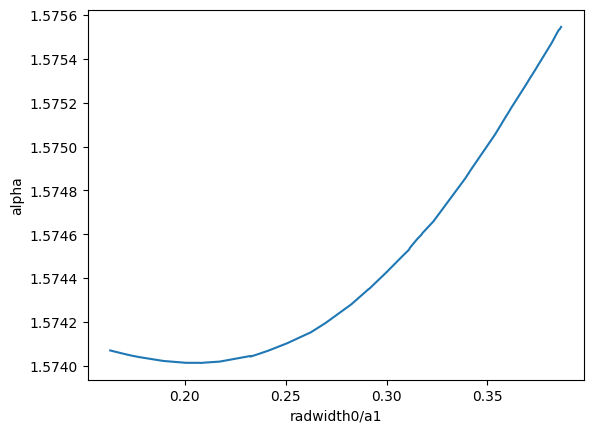

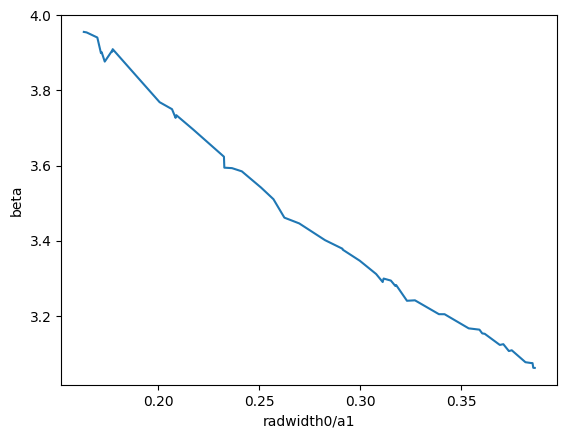

In [17]:
def f(x, a1, a2):
  return - a1 * np.log(x/a2)

variable_funcs = {"radwidth0/a1" : lambda cf, m0 : cf["a"][0]/cf["a"][1]}
key = "radwidth0/a1"

data = hist_prob_sets[25]
data = sorted(data, key=lambda cf: variable_funcs[key](cf, cf["m0s"][0]))
meta_xs, meta_ys1, meta_ys2 = [], [], []
for cf in data:
    xs = list(range(1, 151))
    ys = [cf[cf["m0s"][0]]["log errors am"][i] for i in range(150)]
    # xs, ys = loc_max(xs, ys)
    popt, pcov = curve_fit(f, xs, ys, p0=(1, 1))
    # print("Best-fit parameters:", popt)
    meta_xs.append(variable_funcs[key](cf, cf["m0s"][0]))
    meta_ys1.append(popt[0])
    meta_ys2.append(popt[1])
    # ys_calc = [f(x, *popt) for x in list(range(1, 151))]
    # plt.plot(xs, ys, label="Data")
    # plt.plot(list(range(1, 151)), ys_calc, color="red", label="Fit")
    # plt.legend()
    # plt.show()

plt.plot(meta_xs, meta_ys1)
# popt, pcov = curve_fit(meta_f1, meta_xs, meta_ys1, p0=(1, 2, 3))
# print("Best-fit parameters:", popt)
# plt.plot(meta_xs, [meta_f1(x, *popt) for x in meta_xs])
plt.xlabel(key)
plt.ylabel("alpha")
plt.show()

plt.plot(meta_xs, meta_ys2)
# popt, pcov = curve_fit(meta_f2, meta_xs, meta_ys2, p0=(1, 2, 3))
# print("Best-fit parameters:", popt)
# plt.plot(meta_xs, [meta_f1(x, *popt) for x in meta_xs])
plt.xlabel(key)
plt.ylabel("beta")
plt.show()

In [ ]:
# Data to confirm shielding independence (just (h-d0)/radwidth0, (h-d1)/(h-d0)) if (h-d2)>(h-d1)
file3 = "data/histogram-6.pkl"

hmdrs = [30]
right_ratios = [0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1.01, 1.05, 1.1, 1.3, 1.5, 2, 2.5, 3]

rho, big_nmk, nmk_max = 1023, 200, 150

def generate_h_d_a_m0_3_region_no_shield(hmdr, right_ratio):
  hmd0 = random.uniform(low = 0, high = 10)
  hmd1 = right_ratio * hmd0
  hmd2 = random.uniform(low = 1.01, high = 5) * hmd1
  radwidth0 = hmd0/hmdr
  radwidth1 = hmd1/random.uniform(low = 1, high = 10)
  radwidth2 = hmd2/random.uniform(low = 1, high = 10)

  hmds = [hmd0, hmd1, hmd2]
  radwidths = [radwidth0, radwidth1, radwidth2]

  h = random.uniform(low = 1.01, high = 3) * max(hmds)
  m0 = random.uniform(low = 1, high = 60)/h
  a = [sum(radwidths[0:i+1]) for i in range(3)]
  d = [h - hmd for hmd in hmds]
  return h, d, a, m0

# all_prob_sets = []
# region_count, heaving, NMK = 3, [1, 0, 0], [big_nmk] * 4
# for hmdr in hmdrs:
#   for right_ratio in right_ratios:
#     prob_set = []
#     for i in range(50):
#       h, d, a, m0 = generate_h_d_a_m0_3_region_no_shield(hmdr, right_ratio)
#       prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
#     all_prob_sets.append(prob_set)
#     update_data_file(all_prob_sets, file3)
#     print("Finished a set.", region_count, hmdr, right_ratio)

def generate_h_d_a_m0_multi_region_no_shield(hmdr, right_ratio, regions):
  hmd0 = random.uniform(low = 0, high = 10)
  hmd1 = right_ratio * hmd0
  hmds = [hmd0, hmd1]

  for i in range(2, regions):
    hmds.append(random.uniform(low = 1.01, high = 3) * hmds[-1])

  radwidths = [hmd0/hmdr]
  for i in range(1, regions):
    radwidths.append(hmds[i]/random.uniform(low = 1, high = 10))

  h = random.uniform(low = 1.01, high = 3) * max(hmds)
  m0 = random.uniform(low = 1, high = 60)/h
  a = [sum(radwidths[0:i+1]) for i in range(regions)]
  d = [h - hmd for hmd in hmds]
  return h, d, a, m0


# region_counts = [4, 5, 6]
# right_ratios = [0.5, 0.95, 1.05, 1.1, 1.3, 2]
# all_prob_sets = [open_pkl_file(file3)]
# all_prob_sets.append([])
# for hmdr in hmdrs:
#   for right_ratio in right_ratios:
#     for region_count in region_counts:
#       heaving, NMK = [region == 0 for region in range(region_count)], [big_nmk] * (region_count + 1)
#       prob_set = []
#       for i in range(50):
#         h, d, a, m0 = generate_h_d_a_m0_multi_region_no_shield(hmdr, right_ratio, region_count)
#         prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
#       all_prob_sets[1].append(prob_set)
#       update_data_file(all_prob_sets, file3)
#       print("Finished a set.", region_count, hmdr, right_ratio)

{'h': 19.19033449018017, 'd': [12.015173854232685, 15.602754172206428, 14.655857626153022, 12.553890242859072], 'a': [0.23917202119824948, 1.7329142873355246, 2.3265631037306806, 7.576255921539536], 'region': 0, 'm0s': [1.5112609757195152]}
{'h': 13.152596287613036, 'd': [8.629251901573603, 10.89092409459332, 10.260784225655566, 10.181732223139011], 'a': [0.15077814620131444, 0.3896679898051153, 0.7208623377215232, 1.3838444389126798], 'region': 0, 'm0s': [3.272832027527975]}
{'h': 18.165210312365662, 'd': [9.99089809570287, 14.078054204034267, 13.032275472723384, 7.344421142483959], 'a': [0.27247707388875975, 0.6888571926835095, 4.061891392752815, 8.533911849384534], 'region': 0, 'm0s': [0.3728688956103428]}
{'h': 47.675015770266405, 'd': [39.85799151268517, 43.766503641475786, 39.9125549132349, 28.492449889122355], 'a': [0.2605674752527079, 3.772952965740862, 5.118616081575114, 12.847211794453212], 'region': 0, 'm0s': [0.7816827759425833]}
{'h': 0.3383674769051059, 'd': [0.2073842286